# INIT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MODULES PATH
import sys
sys.path.append('/content/drive/MyDrive/TFM_Retail_Repo/03_Clustering')

from modules import kmeans_module as km_m
from modules import preprocessing_module as pm


## Importacion datos

In [3]:
from modules.get_data import get_data

In [4]:
df_cal = get_data('exp_calendar.csv')
df_items = get_data('exp_items.csv')
df_shops = get_data('exp_shops.csv')
# df_ws = get_data('exp_weekly_sales.csv')
df_ws = get_data('daily_sales_with_events.csv') # Vamos a probar con diarias -> filtramos por años para que no pete la creacion de caracteristicas

/content/drive/MyDrive/TFM_Retail_Repo/03_Clustering/modules/get_data.py:23: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


In [5]:
# Seleccionar solo años 2014 a 2016 de df_ws
df_ws = df_ws[(df_ws['year'] >= 2014) & (df_ws['year'] <= 2016)]

# Cambiamos NaN de event por None
df_ws['event'] = df_ws['event'].fillna('None')

display(df_ws.shape)

(9693001, 12)

___
___

# CREACION FEATS. GENERALES

In [ ]:
!pip install featuretools # install the missing module

In [7]:
from modules import feature_creation_module as fcm

In [8]:
df_ws = df_ws.drop(columns=['event']) # no nos sirve ahora

In [9]:
# Creacion caracteristicas globales para tiendas (luego iremos filtrando)
fc_config = {
    'target_df': 'shops',  # El DataFrame que contiene información sobre las tiendas
    'agg_primitives': [
        'min',               # Mínimo
        'max',               # Máximo
        'mean',              # Promedio
        'std',               # Desviación estándar
        'sum',               # Suma
        'count'              # Totales
    ],
    'trans_primitives': [
        # Ya tenemos el month en este df_ws
        # 'month',  # Extrae el mes para observar patrones estacionales a nivel semanal
        'is_weekend'  # Indica si la semana incluye fines de semana
    ],
    'max_depth': 2  # Profundidad máxima de las características generadas
}

feature_matrix, feature_defs = fcm.create_features(df_items, df_shops, df_ws, fc_config)

/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. 

In [10]:
feature_matrix.head()

,COUNT(sales),MAX(sales.month),MAX(sales.raw_earn),MAX(sales.sell_price),MAX(sales.units),MAX(sales.week),MAX(sales.weekday_number),MAX(sales.year),MEAN(sales.month),MEAN(sales.raw_earn),...,STD(sales.week),STD(sales.weekday_number),STD(sales.year),SUM(sales.month),SUM(sales.raw_earn),SUM(sales.sell_price),SUM(sales.units),SUM(sales.week),SUM(sales.weekday_number),SUM(sales.year)
store_code,,,,,,,,,,,,,,,,,,,,,
NYC_1,1090025,12.0,938.232,41.2034,260.0,53.0,6.0,2016.0,5.996676,12.834098,...,15.353946,2.035257,0.695401,6536527.0,1.398949e+07,5.431792e+06,3692451.0,26712944.0,3406912.0,2.196112e+09
NYC_2,937591,12.0,458.451,41.2034,185.0,53.0,6.0,2016.0,6.014574,11.375500,...,15.536503,2.031580,0.710880,5639210.0,1.066557e+07,4.692836e+06,2705376.0,23102762.0,2983687.0,1.889057e+09
NYC_3,1237088,12.0,1508.520,41.2034,376.0,53.0,6.0,2016.0,5.973698,16.051698,...,15.326362,2.027561,0.696121,7389990.0,1.985736e+07,6.192188e+06,5318014.0,30198468.0,3802844.0,2.492403e+09
NYC_4,843046,12.0,465.000,41.2034,300.0,53.0,6.0,2016.0,5.978209,9.227017,...,15.353289,2.035564,0.699142,5039905.0,7.778800e+06,4.080702e+06,2013616.0,20600848.0,2578568.0,1.698522e+09
BOS_1,866124,12.0,575.424,60.9750,323.0,53.0,6.0,2016.0,5.968540,11.165976,...,15.372303,2.034166,0.696255,5169496.0,9.671119e+06,4.159710e+06,2626055.0,21107029.0,2696036.0,1.745016e+09


## Descripciones

In [11]:
# Revision definiciones caracteristicas creadas
features_descriptions = fcm.get_features_descriptions(feature_defs)

display(type(features_descriptions))

display(features_descriptions)

list

['<Feature: COUNT(sales)>: The number of all instances of "sales" for each "store_code" in "shops".',
 '<Feature: MAX(sales.month)>: The maximum of the "month" of all instances of "sales" for each "store_code" in "shops".',
 '<Feature: MAX(sales.raw_earn)>: The maximum of the "raw_earn" of all instances of "sales" for each "store_code" in "shops".',
 '<Feature: MAX(sales.sell_price)>: The maximum of the "sell_price" of all instances of "sales" for each "store_code" in "shops".',
 '<Feature: MAX(sales.units)>: The maximum of the "units" of all instances of "sales" for each "store_code" in "shops".',
 '<Feature: MAX(sales.week)>: The maximum of the "week" of all instances of "sales" for each "store_code" in "shops".',
 '<Feature: MAX(sales.weekday_number)>: The maximum of the "weekday_number" of all instances of "sales" for each "store_code" in "shops".',
 '<Feature: MAX(sales.year)>: The maximum of the "year" of all instances of "sales" for each "store_code" in "shops".',
 '<Feature: ME

# **TIENDAS: PERFORMANCE VENTAS GENERAL**  
  
Esta configuración se centra en la evaluación general del rendimiento de ventas en cada tienda.


___
___

## Selección caracteristicas

In [12]:
# V4 -> Probamos solo con las caracteristicas de ventas
substrings = ['units', 'raw_earn']
feat_selected = fcm.select_features(features_descriptions, substrings)
feature_matrix_selected = feature_matrix[feat_selected].copy()
print(f'Length Feats Selected: {feature_matrix_selected.shape}')

# display(feature_matrix_selected.head(5))

# Aplicar filtros a las caracteristicas creadas
# Remove low information, highly correlated, highly null and single value features
filtered_feature_matrix = fcm.filter_feature_matrix(feature_matrix_selected)

# Renombrar características si es necesario # Evitamos este paso de momento
# feature_matrix_renamed = fcm.rename_features(filtered_feature_matrix, price_range_features)
feature_matrix_renamed = filtered_feature_matrix.copy()

display(feature_matrix_renamed.head(5))

Length Feats Selected: (10, 10)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Shape before filtering: 10
Shape after filtering: 5
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,MAX(sales.raw_earn),MAX(sales.units),MEAN(sales.raw_earn),MIN(sales.raw_earn),STD(sales.raw_earn)
store_code,,,,,
NYC_1,938.232,260.0,12.834098,0.0665,18.205904
NYC_2,458.451,185.0,11.375500,0.2400,13.294661
NYC_3,1508.520,376.0,16.051698,0.2400,24.534254
NYC_4,465.000,300.0,9.227017,0.2400,10.458066
BOS_1,575.424,323.0,11.165976,0.0600,14.811843


## Preprocesamiento datos

In [13]:
scaled_df = pm.preprocess_features(feature_matrix_renamed)

Cat cols: 0
Num cols: 5


## Kmeans

Elbow & Silhoutee

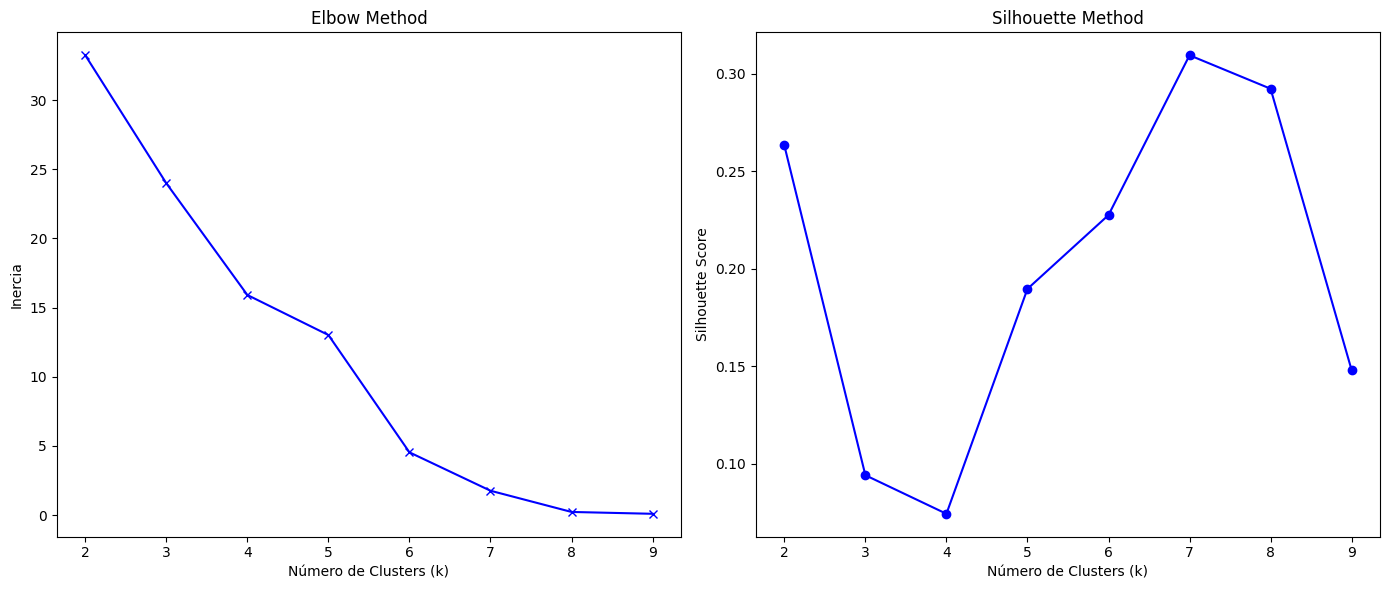

In [14]:
km_m.plot_elbow_silhouette(scaled_df, 9)

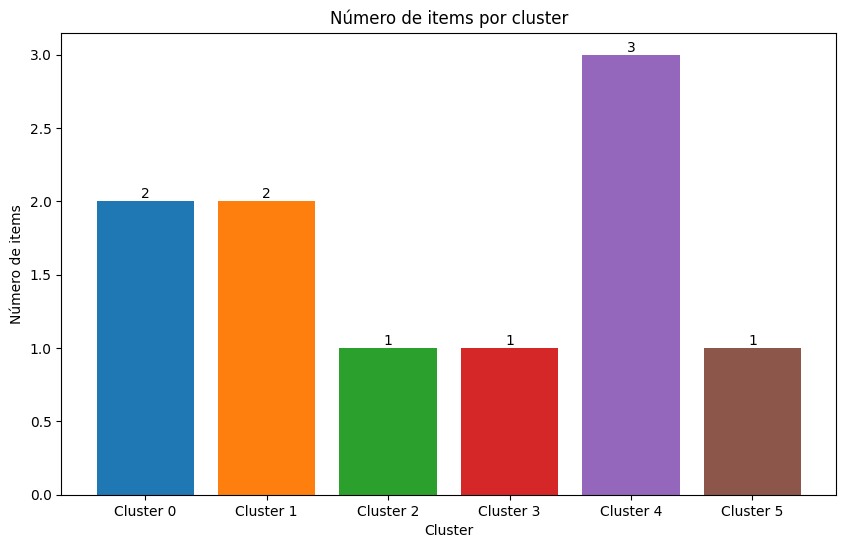

,MAX(sales.raw_earn),MAX(sales.units),MEAN(sales.raw_earn),MIN(sales.raw_earn),STD(sales.raw_earn),Cluster
store_code,,,,,,
NYC_1,938.232,260.0,12.834098,0.0665,18.205904,1
NYC_2,458.451,185.0,11.375500,0.2400,13.294661,0
NYC_3,1508.520,376.0,16.051698,0.2400,24.534254,2
NYC_4,465.000,300.0,9.227017,0.2400,10.458066,0
BOS_1,575.424,323.0,11.165976,0.0600,14.811843,4


In [15]:
optimal_k = 6 # codo + silueta

kmeans_model, feature_matrix_with_clusters = km_m.apply_kmeans_and_plot(optimal_k, scaled_df, feature_matrix_renamed)

feature_matrix_with_clusters.head(5)

Analisis

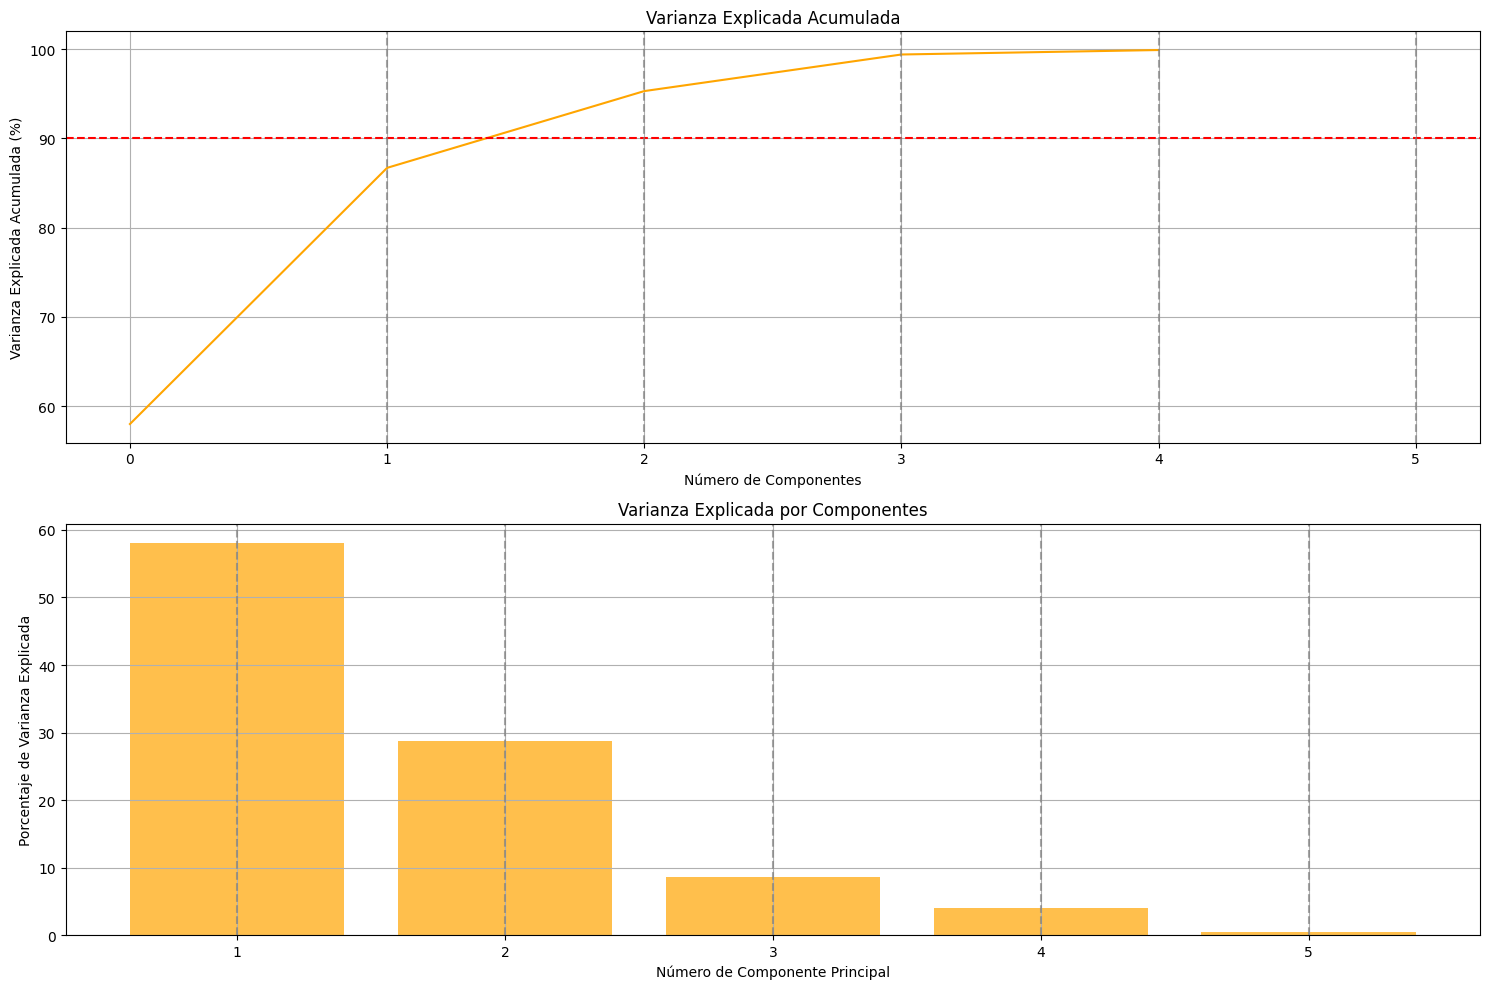

Varianza explicada por cada componente (%): [58.  28.7  8.6  4.1  0.5]


,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5
0,58.0,86.7,95.3,99.4,99.9


In [16]:
# Vemos varianza acumulada en componentes principales
variance_ratio = km_m.view_pca_variance(scaled_df)

acc_var = km_m.calculate_accumulated_variance(variance_ratio)

display(acc_var)

Importancia caracteristicas

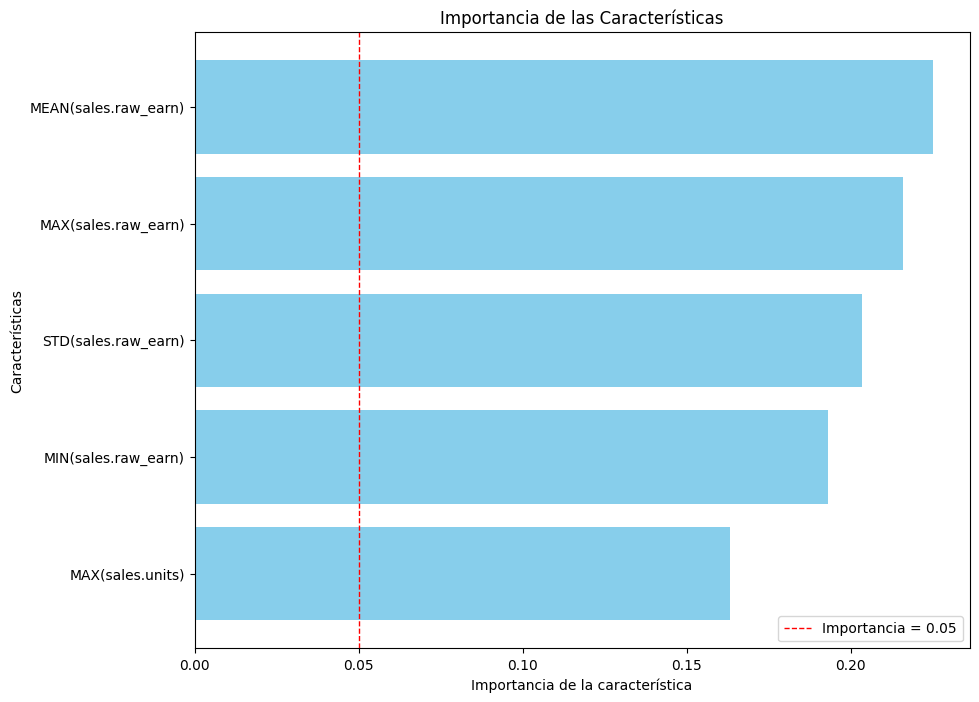

In [18]:
# Importancia de caracteristicas
# Preprocesamos datos
cluster_col='Cluster'
df_clusters = feature_matrix_with_clusters[[cluster_col]].copy().reset_index(drop=True)

# Combinar los DataFrames basándose en la columna 'Index'
preprocessed_df = pd.concat([scaled_df, df_clusters], axis=1)

clusters = kmeans_model.labels_

IMPORTANCE_THRES=0.05
importance_df = km_m.get_feature_importances(preprocessed_df, clusters, imp_threshold=IMPORTANCE_THRES)

# Seleccionamos solo las caracteristicas que tienen importancia por encima o igual del umbral
selected_features = importance_df[importance_df['Importance'] >= IMPORTANCE_THRES]

# Creamos una lista con las features más importantes usando la columna feature de importance_df
most_important_features = selected_features['Feature'].tolist()

# display(importance_df.head(10))

## Dim redux

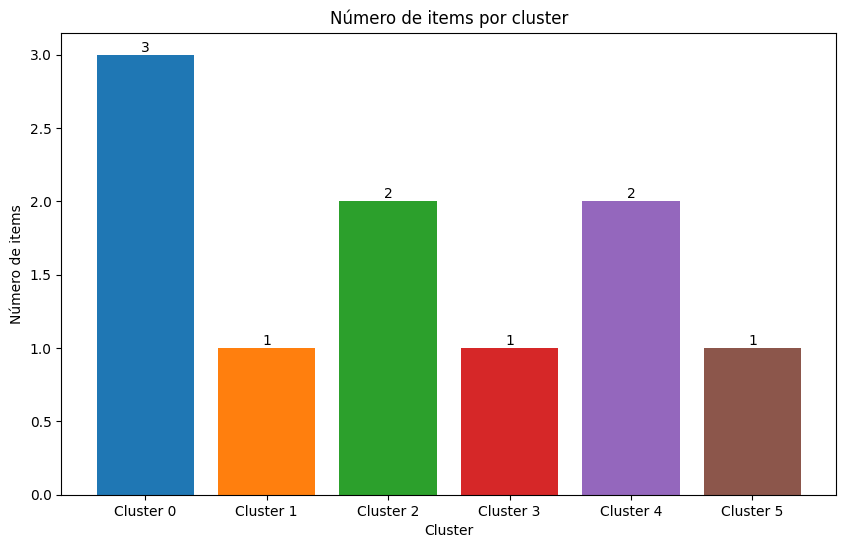

In [19]:
# Ejecutar PCA y clustering
n_components = 3 # Segun visto en varianza acumulada -> +90%

# Obtenemos scaled df con componentes y clusters
df_with_pca, loadings_df = km_m.pca_and_cluster(scaled_df, n_clusters=optimal_k, n_components=n_components)

# # Mostrar el DataFrame con PCA y clustering
# display(df_with_pca.head(5))

# Graficar la cantidad de items por cluster
show_clusters = km_m.plot_cluster_sizes(df_with_pca)

## Descripcion de clusters

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


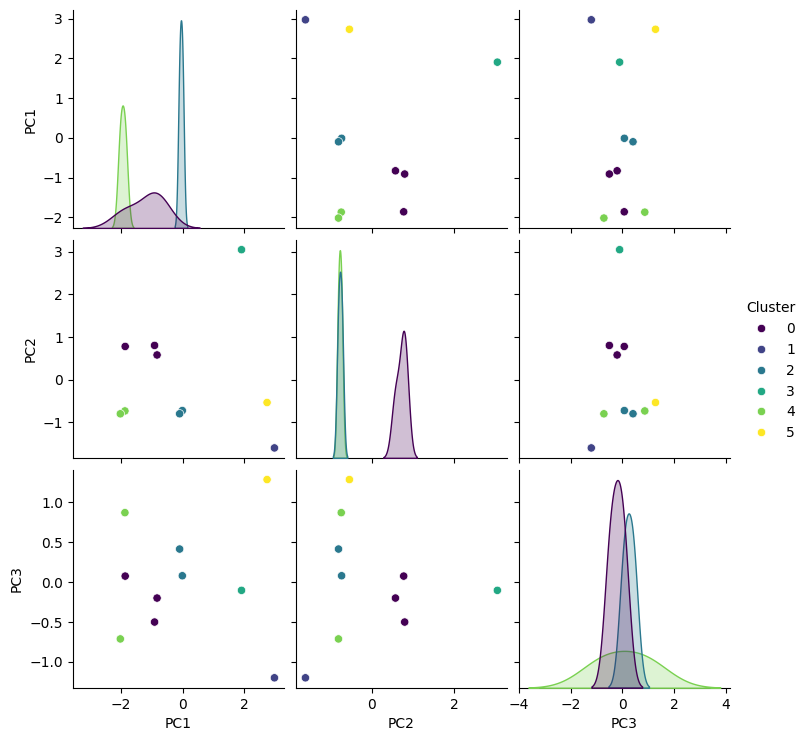

In [20]:
# Visualizacion clusters
cols = n_components + 1 # -> Seleccionamos solo las columnas de PC + Cluster
df_pairplot = df_with_pca.iloc[:, -(cols):]

df_pairplot['Cluster'] = df_with_pca['Cluster']
sns.pairplot(df_pairplot[0:], hue='Cluster', palette='viridis')

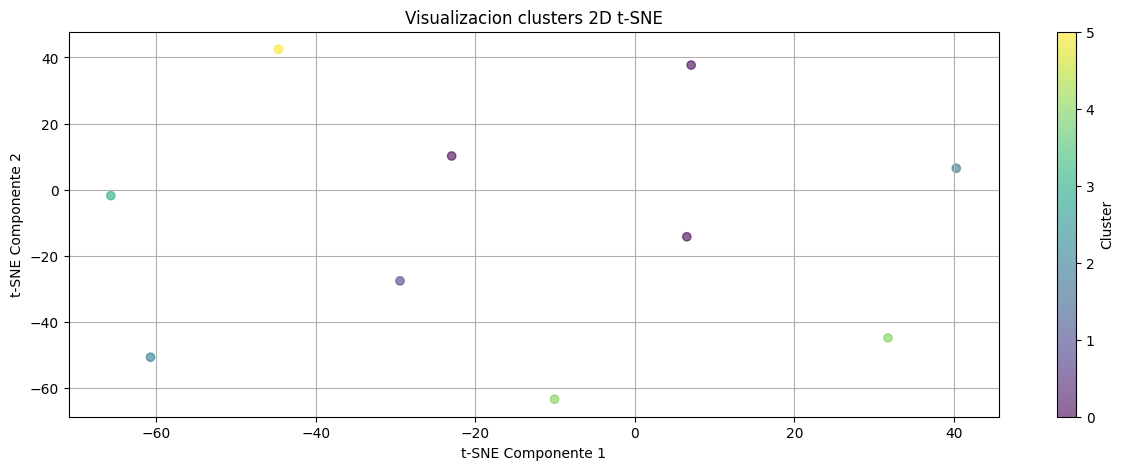

In [22]:
# T SNE visualizacion de clusters
km_m.tsne_visualization(df_pairplot, n_components=2, perplexity=9)

**Analisis**  
  
Quizás habria que probar con un optimal_k de 3.  
6 para diez tiendas parece mucho.

In [ ]:
# Seleccionamos las features según la lista most_important_features obtenida con random forest
importance_df_filt = importance_df[importance_df['Feature'].isin(most_important_features)]

# Crear y mostrar descripciones de los clusters
description_df = km_m.create_cluster_descriptions(df_with_pca, importance_df_filt)
print('###########################################################')
print('Descripcion de los clusters')
print('###########################################################')
# Ordenamos columnas de description_df usando sort
description_df = description_df[sorted(description_df.columns)]
display(description_df)

In [ ]:
# Añadimos clusters a df_items
df_shops = df_shops.reset_index(drop=True) # Recuperamos indices originales

df_shops_with_clusters = df_shops.merge(df_with_pca[['Cluster']], left_index=True, right_index=True)

df_shops_with_clusters.head()

In [ ]:
# Crear dataframe con las descripciones de los clusters
cluster_summary = {

}

cluster_summary_df = pd.DataFrame.from_dict(cluster_summary, orient='index')

# Asumiendo que tienes un dataframe `items_df` que tiene una columna 'cluster' con los números de cluster
# Realiza un merge con el resumen de clusters para añadir los nombres y descripciones al dataframe original
shops_with_cluster_info = df_shops_with_clusters.merge(cluster_summary_df, left_on='Cluster', right_index=True, how='left')

shops_with_cluster_info = shops_with_cluster_info.rename(columns={'Cluster':'cluster'})

# Resultado: `shops_with_cluster_info` tendrá las columnas adicionales 'cluster_name' y 'description'
display(shops_with_cluster_info.head())

In [ ]:
km_m.plot_clusters_with_name(shops_with_cluster_info)

## Guardar CSV

In [ ]:
# Guardamos df como csv
from google.colab import files

file_name = 'shops_global_sales_performance.csv'

# # Exportar DataFrame a CSV (reemplaza 'df' por el nombre de tu DataFrame)
# shops_with_cluster_info.to_csv(file_name, index=False)

# # Descargar el archivo CSV
# files.download(file_name)

# **MIX DE PRODUCTOS: Segun cluster performance ventas global**  
  
Esta configuración se centra en entender la variedad y popularidad de los productos en diferentes tiendas.
___
___

## Importacion de datos

In [24]:
# Cargamos df de items con segmentacion segun ventas diarias de 2014 a 2016 de estos
# PENDING -> Actualizar fichero con clusters segun fix de PCAs
df_items_sp_clusters = get_data('_clusters/items_clusters_raw_earn.csv')

In [ ]:
display(df_items_sp_clusters.head())
display(df_shops.head())
display(df_ws.head())

In [28]:
# ONE HOT ENCODING DE LOS CLUSTERS - PARA EVITAR CREAR CARACTERISTICAS NUMERICAS BASADAS EN ELLOS
# Guardamos los nombres y definiciones de los clusters aparte para trabajar solo con la columna Cluster de productos
# Crear el diccionario de nombres y descripciones de clusters
cluster_dict = df_items_sp_clusters[['Cluster', 'cluster_name', 'description']].drop_duplicates().set_index('Cluster').to_dict('index')

df_items_ohe = df_items_sp_clusters.copy()

# Hacer OHE usando scikit learn
from sklearn.preprocessing import OneHotEncoder
df_items_ohe = df_items_ohe.drop(columns=['Cluster', 'description'])

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
df_items_ohe = ohe.fit_transform(df_items_ohe[['cluster_name']])
df_items_ohe = pd.DataFrame(df_items_ohe, columns=ohe.get_feature_names_out(['cluster_name']))
df_items_ohe = pd.concat([df_items_sp_clusters[['item']], df_items_ohe], axis=1)

# display(df_items_ohe.head())

## Seleccion / Creacion caracteristicas

In [ ]:
# Creacion caracteristicas globales para tiendas (luego iremos filtrando)
fc_config = {
    'target_df': 'shops',  # El DataFrame que contiene información sobre las tiendas
    'agg_primitives': [
        'mean',              # Promedio
        'sum',               # Suma
        'count'              # Totales
    ],
    'trans_primitives': [
        'percentile'
    ],
    'max_depth': 2  # Profundidad máxima de las características generadas
}

feature_matrix, feature_defs = fcm.create_features(df_items_ohe, df_shops, df_ws, fc_config)

In [ ]:
# Revision definiciones caracteristicas creadas
features_descriptions = fcm.get_features_descriptions(feature_defs)

display(type(features_descriptions))

display(features_descriptions)

## Seleccion caracteristicas

In [ ]:
substrings = substrings = [
    'items',
    'units',
    'raw_earn',
    'sell_price',
    'cluster_name'
]

feat_selected = fcm.select_features(features_descriptions, substrings)

print(f'Length Feats Selected: {len(feat_selected)}')
# display(feat_selected)

feature_matrix_selected = feature_matrix[feat_selected].copy()

# display(feature_matrix_selected.head(5))

# Aplicar filtros a las caracteristicas creadas
# Remove low information, highly correlated, highly null and single value features
filtered_feature_matrix = fcm.filter_feature_matrix(feature_matrix_selected)

# Renombrar características si es necesario # Evitamos este paso de momento
# feature_matrix_renamed = fcm.rename_features(filtered_feature_matrix, price_range_features)
feature_matrix_renamed = filtered_feature_matrix.copy()

display(feature_matrix_renamed.head(5))

## Preprocesamiento datos

In [ ]:
scaled_df = pm.preprocess_features(feature_matrix_renamed)

## Kmeans

Elbow & Silhoutte

In [ ]:
km_m.plot_elbow_silhouette(scaled_df, 9)

In [ ]:
optimal_k = 6 # codo + silueta

kmeans_model, feature_matrix_with_clusters = km_m.apply_kmeans_and_plot(optimal_k, scaled_df, feature_matrix_renamed)

feature_matrix_with_clusters.head(5)

Analisis

In [ ]:
# Vemos varianza acumulada en componentes principales
variance_ratio = km_m.view_pca_variance(scaled_df)

acc_var = km_m.calculate_accumulated_variance(variance_ratio)

display(acc_var)

Importancia caracteristicas

In [ ]:
# Importancia de caracteristicas
# Preprocesamos datos
cluster_col='Cluster'
df_clusters = feature_matrix_with_clusters[[cluster_col]].copy().reset_index(drop=True)

# Combinar los DataFrames basándose en la columna 'Index'
preprocessed_df = pd.concat([scaled_df, df_clusters], axis=1)

clusters = kmeans_model.labels_

IMPORTANCE_THRES=0.05
importance_df = km_m.get_feature_importances(preprocessed_df, clusters, imp_threshold=IMPORTANCE_THRES)

# Seleccionamos solo las caracteristicas que tienen importancia por encima o igual del umbral
selected_features = importance_df[importance_df['Importance'] >= IMPORTANCE_THRES]

# Creamos una lista con las features más importantes usando la columna feature de importance_df
most_important_features = selected_features['Feature'].tolist()

# display(importance_df.head(10))

## Dim redux

In [ ]:
# Ejecutar PCA y clustering
n_components = 3 # Segun visto en varianza acumulada -> casi 95%

# Obtenemos scaled df con componentes y clusters
df_with_pca, loadings_df = km_m.pca_and_cluster(scaled_df, n_clusters=optimal_k, n_components=n_components)

# # Mostrar el DataFrame con PCA y clustering
# display(df_with_pca.head(5))

# Graficar la cantidad de items por cluster
show_clusters = km_m.plot_cluster_sizes(df_with_pca)

## Descripcion de clusters

In [ ]:
# Visualizacion clusters
cols = n_components + 1 # -> Seleccionamos solo las columnas de PC + Cluster
df_pairplot = df_with_pca.iloc[:, -(cols):]

df_pairplot['Cluster'] = df_with_pca['Cluster']
sns.pairplot(df_pairplot[0:], hue='Cluster', palette='viridis')

In [ ]:
# T SNE visualizacion de clusters
km_m.tsne_visualization(df_pairplot, n_components=2, perplexity=30)

In [ ]:
# Seleccionamos las features según la lista most_important_features obtenida con random forest
importance_df_filt = importance_df[importance_df['Feature'].isin(most_important_features)]

# Crear y mostrar descripciones de los clusters
description_df = km_m.create_cluster_descriptions(df_with_pca, importance_df_filt)
print('###########################################################')
print('Descripcion de los clusters')
print('###########################################################')
# Ordenamos columnas de description_df usando sort
description_df = description_df[sorted(description_df.columns)]
display(description_df)

In [ ]:
# Añadimos clusters a df_items
df_shops = df_shops.reset_index(drop=True) # Recuperamos indices originales

df_shops_with_clusters = df_shops.merge(df_with_pca[['Cluster']], left_index=True, right_index=True)

df_shops_with_clusters.head()

In [ ]:
# Crear dataframe con las descripciones de los clusters
cluster_summary = {

}

cluster_summary_df = pd.DataFrame.from_dict(cluster_summary, orient='index')

# Asumiendo que tienes un dataframe `items_df` que tiene una columna 'cluster' con los números de cluster
# Realiza un merge con el resumen de clusters para añadir los nombres y descripciones al dataframe original
shops_with_cluster_info = df_shops_with_clusters.merge(cluster_summary_df, left_on='Cluster', right_index=True, how='left')

shops_with_cluster_info = shops_with_cluster_info.rename(columns={'Cluster':'cluster'})

# Resultado: `shops_with_cluster_info` tendrá las columnas adicionales 'cluster_name' y 'description'
display(shops_with_cluster_info.head())

In [ ]:
shops_with_cluster_info

In [ ]:
km_m.plot_clusters_with_name(shops_with_cluster_info)

## Guardar CSV

In [ ]:
# Guardamos df como csv
from google.colab import files

file_name = 'shops_products_mix.csv'

# # Exportar DataFrame a CSV (reemplaza 'df' por el nombre de tu DataFrame)
# shops_with_cluster_info.to_csv(file_name, index=False)

# # Descargar el archivo CSV
# files.download(file_name)

# **TIENDAS: SALES w EVENTS**
___
___

In [ ]:
# Recuperamos full df con eventos
df_ws = get_data('daily_sales_with_events.csv')

# Seleccionar solo años 2014 a 2016 de df_ws
df_ws = df_ws[(df_ws['year'] >= 2014) & (df_ws['year'] <= 2016)]

# Cambiamos NaN de event por None
df_ws['event'] = df_ws['event'].fillna('None')

display(df_ws.shape)

## Creacion caracteristicas

In [ ]:
# OHE para columna event en df_ws usando sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

# Seleccionar la columna 'event' para codificar
events = df_ws[['event']]

# Crear el OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Ajustar y transformar los eventos con OHE
event_encoded = ohe.fit_transform(events)

# Crear un DataFrame con las columnas codificadas
event_encoded_df = pd.DataFrame(event_encoded, columns=ohe.get_feature_names_out(['event']))

# Concatenar con el DataFrame original de ventas
df_ws_ohe = pd.concat([df_ws.reset_index(drop=True), event_encoded_df], axis=1)



In [ ]:
display(df_ws_ohe.head())

In [ ]:
# Seteamos index de df_shops a columna store_code
# df_shops.set_index('store_code', inplace=True)
df_shops.head()

In [ ]:
import featuretools as ft

# Crear un EntitySet
es = ft.EntitySet(id='sales_data')

# Agregar entidades
es = es.add_dataframe(dataframe_name="items", dataframe=df_items, index="item")
es = es.add_dataframe(dataframe_name="shops", dataframe=df_shops, index="store_code")
es = es.add_dataframe(dataframe_name="sales", dataframe=df_ws_ohe, index="id",
                      time_index="week",)
                      # secondary_time_index={'year': ['units', 'sell_price', 'raw_earn']})

# Definir relaciones
es = es.add_relationship("items", "item", "sales", "item")
es = es.add_relationship("shops", "store_code", "sales", "store_code")

# Generar características automáticas, ahora centradas en "items"
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_dataframe_name="shops",  # Objetivo: productos
                                      agg_primitives=[
                                          'min',               # Mínimo
                                          'max',               # Máximo
                                          'mean',              # Promedio
                                          'std',               # Desviación estándar
                                          'sum',               # Suma
                                          'count'              # Totales
                                      ],
                                      trans_primitives=[
                                          # Month no hace falta ya lo tenemos en esta iteracion
                                          # 'month',  # Extrae el mes para observar patrones estacionales a nivel semanal
                                          'is_weekend'  # Indica si la semana incluye fines de semana
                                      ],
                                      max_depth=2)

feature_matrix.head(10)

In [ ]:
# Revision definiciones caracteristicas creadas
features_descriptions = fcm.get_features_descriptions(feature_defs)

display(type(features_descriptions))

display(features_descriptions)

## Seleccion caracteristicas

In [ ]:
# V3
substrings = ['raw_earn', 'units', 'event'] # Nos quedamos solo con las que afectan a ventas y eventos

print(f'Length All features: {len(features_descriptions)}')

feat_selected = fcm.select_features(features_descriptions, substrings)

print(f'Length Feats Selected: {len(feat_selected)}')
# display(feat_selected)

feature_matrix_selected = feature_matrix[feat_selected].copy()

# display(feature_matrix_selected.head(5))

# Aplicar filtros a las caracteristicas creadas
# Remove low information, highly correlated, highly null and single value features
filtered_feature_matrix = fcm.filter_feature_matrix(feature_matrix_selected)

# Renombrar características si es necesario # Evitamos este paso de momento
# feature_matrix_renamed = fcm.rename_features(filtered_feature_matrix, price_range_features)
feature_matrix_renamed = filtered_feature_matrix.copy()

display(feature_matrix_renamed.head(5))

## Preprocesamiento de los datos

In [ ]:
scaled_df = pm.preprocess_features(feature_matrix_renamed)

## Kmeans

Elbow & Silouette

In [ ]:
km_m.plot_elbow_silhouette(scaled_df, 9) # No podemos usar más de n_shops - 1

In [ ]:
optimal_k = 6

kmeans_model, feature_matrix_with_clusters = km_m.apply_kmeans_and_plot(optimal_k, scaled_df, feature_matrix_renamed)

feature_matrix_with_clusters.head(5)

Analisis

PCAs

In [ ]:
# Vemos varianza acumulada en componentes principales
variance_ratio = km_m.view_pca_variance(scaled_df)

acc_var = km_m.calculate_accumulated_variance(variance_ratio)

display(acc_var)

Importancia caracteristicas

In [ ]:
# Importancia de caracteristicas
# Preprocesamos datos
cluster_col='Cluster'
df_clusters = feature_matrix_with_clusters[[cluster_col]].copy().reset_index(drop=True)

# Combinar los DataFrames basándose en la columna 'Index'
preprocessed_df = pd.concat([scaled_df, df_clusters], axis=1)

clusters = kmeans_model.labels_

IMPORTANCE_THRES=0.05
importance_df = km_m.get_feature_importances(preprocessed_df, clusters, imp_threshold=IMPORTANCE_THRES)

# Seleccionamos solo las caracteristicas que tienen importancia por encima o igual del umbral
selected_features = importance_df[importance_df['Importance'] >= IMPORTANCE_THRES]

# Creamos una lista con las features más importantes usando la columna feature de importance_df
most_important_features = selected_features['Feature'].tolist()

# display(importance_df.head(10))

## Dimension Redux

In [ ]:
# Ejecutar PCA y clustering
n_components = 5 # Segun visto en varianza acumulada -> casi 95%

# Obtenemos scaled df con componentes y clusters
df_with_pca, loadings_df = km_m.pca_and_cluster(scaled_df, n_clusters=optimal_k, n_components=n_components)

# # Mostrar el DataFrame con PCA y clustering
# display(df_with_pca.head(5))

# Graficar la cantidad de items por cluster
show_clusters = km_m.plot_cluster_sizes(df_with_pca)

## Descripcion de los clusters

In [ ]:
# Visualizacion clusters
cols = n_components + 1 # -> Seleccionamos solo las columnas de PC + Cluster
df_pairplot = df_with_pca.iloc[:, -(cols):]

df_pairplot['Cluster'] = df_with_pca['Cluster']
sns.pairplot(df_pairplot[0:], hue='Cluster', palette='viridis')

In [ ]:
# T SNE visualizacion de clusters
km_m.tsne_visualization(df_pairplot, n_components=2, perplexity=30)

Mostrar descripciones

In [ ]:
# Seleccionamos las features según la lista most_important_features obtenida con random forest
importance_df_filt = importance_df[importance_df['Feature'].isin(most_important_features)]

# Crear y mostrar descripciones de los clusters
description_df = km_m.create_cluster_descriptions(df_with_pca, importance_df_filt)
print('###########################################################')
print('Descripcion de los clusters')
print('###########################################################')
# Ordenamos columnas de description_df usando sort
description_df = description_df[sorted(description_df.columns)]
display(description_df)

In [ ]:
# Asignacion clusters a shops
df_shops = df_shops.reset_index(drop=True) # Recuperamos indices originales

df_shops_with_clusters = df_shops.merge(df_with_pca[['Cluster']], left_index=True, right_index=True)

df_shops_with_clusters.head()

In [ ]:
# Crear dataframe con las descripciones de los clusters
cluster_summary = {

}

cluster_summary_df = pd.DataFrame.from_dict(cluster_summary, orient='index')

# Realiza un merge con el resumen de clusters para añadir los nombres y descripciones al dataframe original
shops_with_cluster_info = df_shops_with_clusters.merge(cluster_summary_df, left_on='Cluster', right_index=True, how='left')

# Resultado: `items_with_cluster_info` tendrá las columnas adicionales 'cluster_name' y 'description'
display(shops_with_cluster_info.head())

In [ ]:
km_m.plot_clusters_with_name(shops_with_cluster_info)

## Guardamos csv

In [ ]:
# Guardamos df como csv
from google.colab import files

file_name = 'shops_clusters_events_influence_sales.csv'

# # Exportar DataFrame a CSV (reemplaza 'df' por el nombre de tu DataFrame)
# shops_with_cluster_info.to_csv(file_name, index=False)

# # Descargar el archivo CSV
# files.download(file_name)